In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [3]:
df = kid_readout.analysis.archive.build_simple_archives('/data/detectors/pkl/2015-05-02_*.pkl')

In [4]:
df.shape

(176, 89)

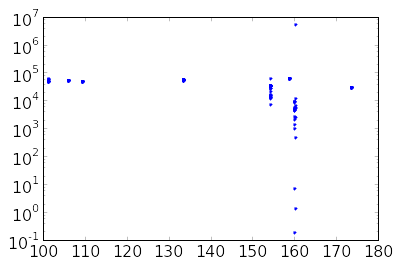

In [10]:
semilogy(df.f_0,df.Q,'.')

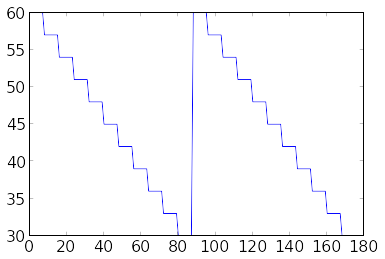

In [11]:
plot(df.atten)

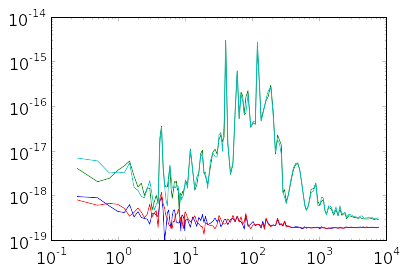

In [19]:
dd = df[(df.atten==30)&(df.resonator_id==3)]
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals.T)

In [13]:
dd.shape

(2, 89)

In [20]:
dd.sweep_filename

83     /data/detectors/2015-05-02_110352.nc
171    /data/detectors/2015-05-02_125248.nc
Name: sweep_filename, dtype: object

In [21]:
pkl = kid_readout.analysis.archive.load_noise_pkl('/data/detectors/pkl/2015-05-02_125248.pkl')

In [26]:
snm = pkl[1]

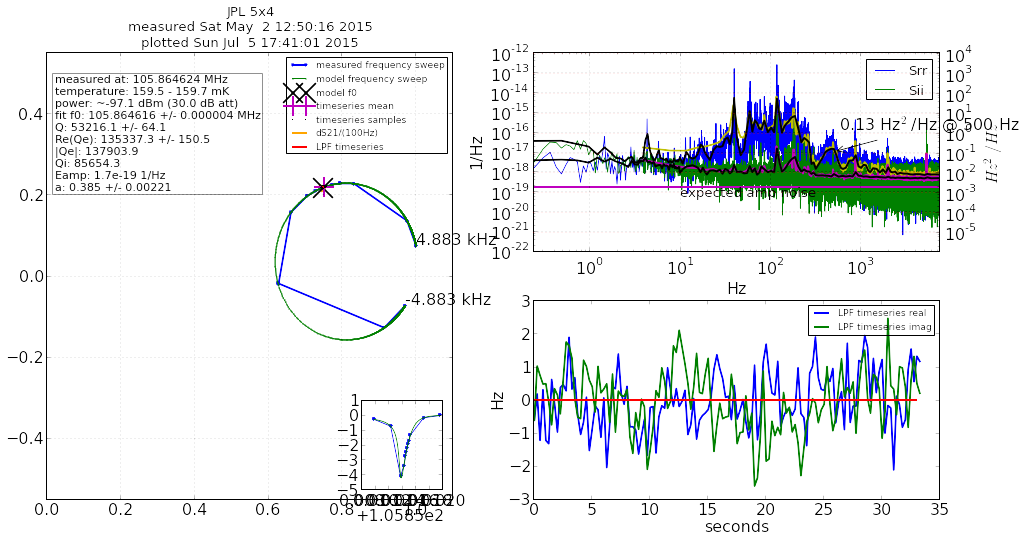

In [27]:
blah =snm.plot()

In [28]:
snm.fractional_fluctuation_timeseries.shape

(524288,)

In [29]:
import kid_readout.analysis.iqnoise

In [30]:
kid_readout.analysis.iqnoise.pca_noise??

In [31]:
fr,S,evals,evects,angles,piq = kid_readout.analysis.iqnoise.pca_noise(snm.fractional_fluctuation_timeseries,use_log_bins=False,Fs=snm.timeseries_sample_rate)

/home/gjones/readout/kid_readout/kid_readout/analysis/iqnoise.py:173: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:,i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/gjones/readout/kid_readout/kid_readout/analysis/iqnoise.py:174: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:,i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/gjones/readout/kid_readout/kid_readout/analysis/iqnoise.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0,k] = ss[0,0]


using NFFT: 2** 16.0


/home/gjones/readout/kid_readout/kid_readout/analysis/iqnoise.py:86: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1,k] = ss[1,1]


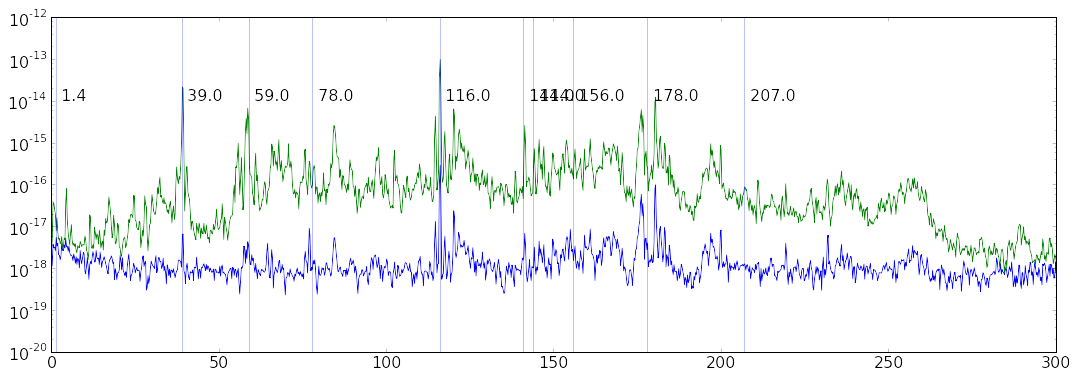

In [38]:
figure(figsize=(18,6))
semilogy(fr,evals.T)
xlim(0,300)
ax = gca()
for spur in [1.4,39,59,78,116,141,144,156,178,207]:
    ax.text(spur,1e-14,(' %.1f' % spur))
    ax.axvline(spur,alpha=0.5)

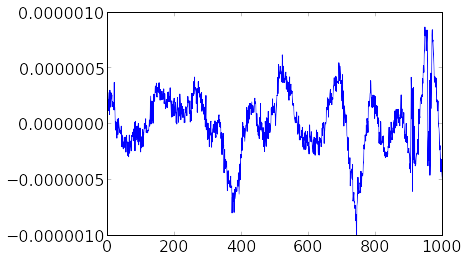

In [42]:
plot(snm.fractional_fluctuation_timeseries.real[:1000])